Setting up local paths

In [2]:
import os
base_path = r"D:\PnuomoniaDetection\chest_xray"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "val")
test_path = os.path.join(base_path, "test")

print("Train path exists:", os.path.exists(train_path))
print("Sample Normal images in train:", os.listdir(os.path.join(train_path, "NORMAL"))[:5])


Train path exists: True
Sample Normal images in train: ['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg']


 Import Libraries & Preprocess Data

In [3]:
# Step 2: Data Preprocessing
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_data = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_data = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Build CNN Model

In [4]:
# Step 3: Build Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\jpriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Train The Model

In [5]:
# Step 4: Model Training
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


c:\Users\jpriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.7160 - loss: 0.6205

c:\Users\jpriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 603ms/step - accuracy: 0.7167 - loss: 0.6192 - val_accuracy: 0.6875 - val_loss: 0.6094
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 639ms/step - accuracy: 0.9179 - loss: 0.2104 - val_accuracy: 0.6875 - val_loss: 0.6626
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 612ms/step - accuracy: 0.9369 - loss: 0.1691 - val_accuracy: 0.6875 - val_loss: 0.7447
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 610ms/step - accuracy: 0.9428 - loss: 0.1593 - val_accuracy: 0.6250 - val_loss: 1.3839
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 597ms/step - accuracy: 0.9458 - loss: 0.1353 - val_accuracy: 0.6250 - val_loss: 1.4056
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 704ms/step - accuracy: 0.9370 - loss: 0.1658 - val_accuracy: 0.6875 - val_loss: 0.7778
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 895ms/step - accuracy: 0.9527 - loss: 0.1242 - val_accuracy: 0.6875 - val_loss: 0.7981
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 891ms/step - accuracy: 0.9559 - loss: 0.1151

Evaluate Model

In [6]:
# Step 5: Evaluate Model
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 325ms/step - accuracy: 0.8688 - loss: 0.4356
Test Accuracy: 84.46%


Visualize accuracy and loss

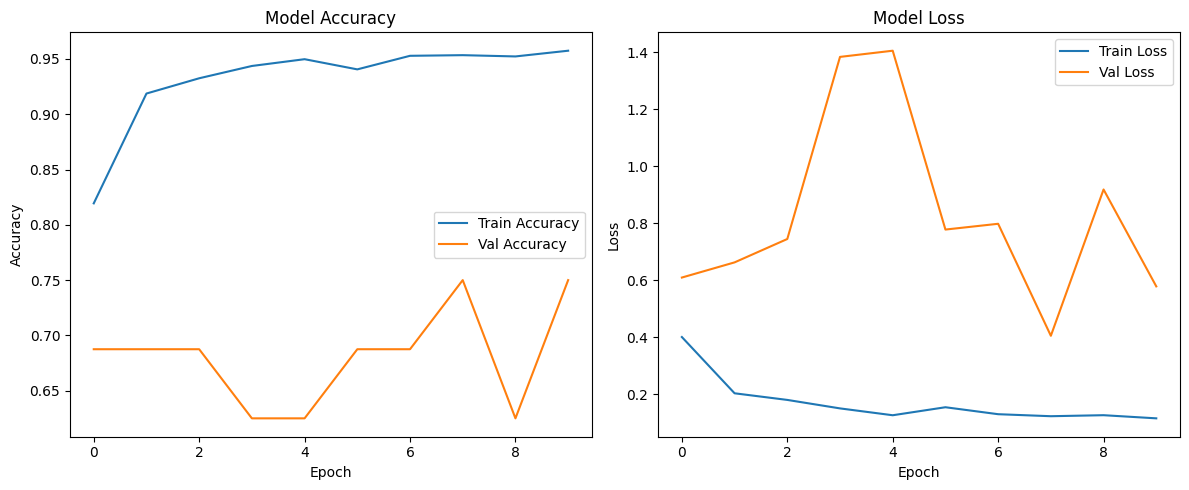

In [7]:
# Step 6: Plot Accuracy and Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Make prediction on a single image

In [12]:
# Step 7: Inference on a Single Image
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "PNEUMONIA" if prediction > 0.5 else "NORMAL"
    print(f"Prediction: {label} (Confidence: {prediction:.2f})")

# Example:
predict_image(r"D:\PnuomoniaDetection\chest_xray\test\PNEUMONIA\images.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: PNEUMONIA (Confidence: 0.83)


Save and Load model

In [15]:
# Step 8: Save model
model.save("xray_model.h5")
print("Model saved!")

# Load model
from tensorflow.keras.models import load_model
loaded_model = load_model("xray_model.h5")
print("Model loaded successfully!")


Model saved!
Model loaded successfully!
